### シグモイド関数

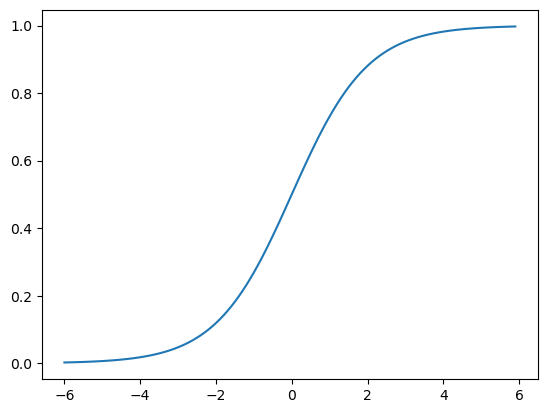

In [64]:
import numpy as np
import matplotlib.pyplot as plt
 
def sigmoid(x):
#     return 1 / (1 + np.e**-x)
    return 1/(1 + np.exp(-x))
    
dx = np.arange(-6, 6, 0.1)
y = sigmoid(dx)
plt.plot(dx, y)
plt.show()
 

### 12-1

In [65]:
import pandas as pd
from sklearn import tree
df = pd.read_csv('../datafiles/KvsT.csv')
x = df.loc[:, '体重':'年代']
t = df['派閥']
model = tree.DecisionTreeClassifier(max_depth = 1,
random_state = 0)
model.fit(x, t)

data = [[65, 20]] # 予測用未知データ
data=pd.DataFrame(data, columns=["体重","年代"])
print(model.predict(data)) # 予測派閥
model.predict_proba(data) # 派閥の確率

['きのこ']


array([[0.6, 0.4]])

### 12-2

In [66]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('../datafiles/iris.csv')
df.head(2)

,がく片長さ,がく片幅,花弁長さ,花弁幅,種類
0,0.22,0.63,0.08,0.04,Iris-setosa
1,0.17,0.42,0.35,0.04,Iris-setosa


### 12-3

In [67]:
# 平均値による欠損値の穴埋め
df_mean = df.mean(numeric_only=True)
train2 = df.fillna(df_mean)

# 特徴量と正解データに分割
x = train2.loc[:, :'花弁幅']
t = train2['種類']

# 特徴量の標準化
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
new = sc.fit_transform(x)

### 12-4

In [68]:
# 訓練データと検証用データに分割
x_train, x_val, y_train, y_val = train_test_split(new, t,
    test_size = 0.2, random_state = 0)

### 12-5

In [69]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C = 0.1,random_state=0,
    multi_class = 'auto', solver = 'lbfgs')

### 12-6

In [70]:
model.fit(x_train, y_train)
print( model.score(x_train, y_train) )
model.score(x_val, y_val)

0.8666666666666667


0.8333333333333334

### 12-7

In [71]:
model.coef_

array([[-0.53209541,  0.48584036, -0.52629135, -0.83192326],
       [ 0.09494378, -0.44720771, -0.00110969, -0.04413366],
       [ 0.43715163, -0.03863265,  0.52740105,  0.87605692]])

### 12-8

In [72]:
x_new = [[1, 2, 3, 4]] # 新規データ

model.predict(x_new) # 新規データで予測

array(['Iris-virginica'], dtype=object)

### 12-9

In [73]:
model.predict_proba(x_new)

array([[4.03394997e-05, 3.02965489e-03, 9.96930006e-01]])

In [74]:
model.intercept_

array([-0.34434407,  0.48688238, -0.14253831])

### 12-10

In [75]:
# モジュールの読み込み
import pandas as pd
from sklearn.model_selection import train_test_split
%matplotlib inline

### 12-11

In [76]:
df = pd.read_csv('../datafiles/Survived.csv') # csvファイルの読み込み
# 確認する
df.head(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C


### 12-12

In [77]:
jo1 = df['Pclass'] == 1
jo2 = df['Survived'] == 0
jo3 = df['Age'].isnull()
df.loc[(jo1) & (jo2) & (jo3), 'Age'] = 43

jo2= df['Survived'] == 1
df.loc[(jo1) & (jo2) & (jo3), 'Age'] = 35

jo1 = df['Pclass'] == 2
jo2 = df['Survived'] == 0
jo3 = df['Age'].isnull()
df.loc[(jo1) & (jo2) & (jo3), 'Age'] = 26

jo2 = df['Survived'] == 1
df.loc[(jo1) & (jo2) & (jo3), 'Age'] = 20

jo1 = df['Pclass'] == 3
jo2 = df['Survived'] == 0
jo3 = df['Age'].isnull()
df.loc[(jo1) & (jo2) & (jo3), 'Age'] = 43

jo2 = df['Survived'] == 1
df.loc[(jo1) & (jo2) & (jo3), 'Age'] = 35

### 12-13

In [78]:
# 特徴量として利用する列のリスト
col = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

x = df[col]
t = df['Survived']

# Sex列は文字の列なのでダミー変数化
dummy = pd.get_dummies(df['Sex'], drop_first = True)
x = pd.concat([x, dummy], axis = 1)
x.head(2)

,Pclass,Age,SibSp,Parch,Fare,male
0,3,22.0,1,0,7.2500,True
1,1,38.0,1,0,71.2833,False


### 12-14

In [79]:
# ランダムフォレストのインポート
from sklearn.ensemble import RandomForestClassifier
x_train, x_test, y_train, y_test=train_test_split(x, t,
 test_size = 0.2, random_state = 0)
model = RandomForestClassifier(n_estimators = 200,
random_state = 0)

### 12-15

In [80]:
model.fit(x_train, y_train)

print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.9887640449438202
0.8715083798882681


### 12-16

In [81]:
from sklearn import tree
model2 = tree.DecisionTreeClassifier(random_state = 0)
model2.fit(x_train, y_train)

print(model2.score(x_train, y_train))
print(model2.score(x_test, y_test))

0.9887640449438202
0.8156424581005587


### 12-17

In [82]:
importance = model.feature_importances_ # 特徴量重要度

# 列との対応がわかりやすいようにシリーズ変換
pd.Series(importance, index = x_train.columns)

Pclass    0.079546
Age       0.323012
SibSp     0.045682
Parch     0.032854
Fare      0.265573
male      0.253334
dtype: float64

### 12-18

In [83]:
# アダブーストのインポート
from sklearn.ensemble import AdaBoostClassifier


# ベースとなるモデル
from sklearn.tree import DecisionTreeClassifier

x_train, x_test, y_train, y_test = train_test_split(x, t,
test_size = 0.2, random_state = 0)
# 最大の深さ5の決定木を何個も作っていく
base_model = DecisionTreeClassifier(random_state = 0,
max_depth = 5)

# 決定木を500個作成
model = AdaBoostClassifier(n_estimators = 500,
# random_state = 0, base_estimator = base_model)
random_state = 0, estimator = base_model)
model.fit(x_train,y_train) # 学習

print(model.score(x_train, y_train)) # 訓練データの正解率
print(model.score(x_test, y_test)) # テストデータの正解率

0.9887640449438202
0.8379888268156425


### 12-19

In [84]:
# データの読み込み
df = pd.read_csv('../datafiles/cinema.csv')
df = df.fillna(df.mean())
x = df.loc[:, 'SNS1':'original']
t = df['sales']
x_train, x_test, y_train, y_test = train_test_split(x, t,
 test_size = 0.2, random_state = 0)

# ランダムフォレスト回帰
from sklearn.ensemble import RandomForestRegressor
# 100個のモデルで並列学習
model = RandomForestRegressor(random_state = 0,
n_estimators = 100)
model.fit(x_train, y_train)
model.score(x_test, y_test) # 決定係数

0.5563347234627347

### 12-20

In [87]:
# アダブースト回帰
from sklearn.ensemble import AdaBoostRegressor
 # ベースモデルとしての回帰木
from sklearn.tree import DecisionTreeRegressor

base = DecisionTreeRegressor(random_state = 0,
 max_depth = 3)

# 100個のモデルで逐次学習
model = AdaBoostRegressor(random_state = 0,
#  n_estimators = 100,base_estimator = base)
 n_estimators = 100,estimator = base)
model.fit(x_train, y_train)
model.score(x_test, y_test)# 決定係数

0.6748482902800903

In [ ]:
#